#### 1 

1. Define a function def check_all_even_or_all_odd(number) to check whether all digits of a given number are either all even or all odd.

    - Return True if all digits are even or all are odd.

    - Otherwise, return False.

2. 2D Array Generation
    - Generate a 4x4 2D array with random integers between 1 and 100, using np.random.seed(4) for reproducibility.

3. Diagonal Element Check
    - Check and output a list of elements on the main diagonal of the array whose digits are all even or all odd



In [4]:
import numpy as np
def kiem_tra_chu_so(so): 
    str_so = str(so)
    so_chan = [ i for i in str_so if int(i)%2 == 0]
    if len(so_chan) == len(str_so): 
        return True
    else: return False 

np.random.seed(4)
arr1= np.random.randint(1,4, size= (4,4))

duong_cheo = [ arr1[i,i] for i in range(4)]
ket_qua = [int(i) for i in duong_cheo if kiem_tra_chu_so(i)]

print(f"Mảng 2 chiều 4x4: \n{arr1}")
print(f"\nDanh sách các phần tử trên đường chéo chính có chữ số đều là số chẵn hoặc số lẻ: {ket_qua}")

Mảng 2 chiều 4x4: 
[[3 3 2 2]
 [1 1 3 2]
 [3 1 2 3]
 [2 1 1 3]]

Danh sách các phần tử trên đường chéo chính có chữ số đều là số chẵn hoặc số lẻ: [2]


#### 2
 Text Analysis and Visualization from `udemy_courses.csv`
1. Read and Preprocess Text Data

    - Load the dataset udemy_courses.csv.

    - Extract the course_title column and convert it into a single text string.

    - Normalize the text by removing stop words (e.g., "of", "a", "the", "as", etc.).

2. Create a WordCloud

    - Generate a WordCloud visualization from the processed text.

    - Set the maximum number of displayed words to 200.

3. Custom WordCloud Shape using an Image

    - Use the image file chiakhoa.jpg (a key-shaped image).

    - Generate a WordCloud in the shape of this image to match the sample output provided

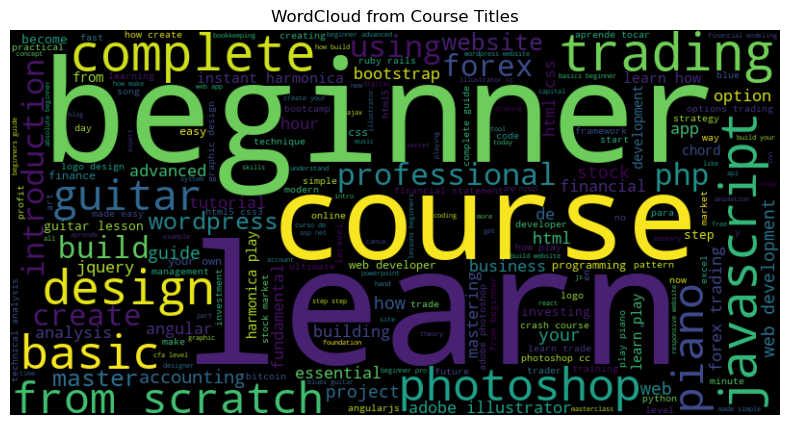

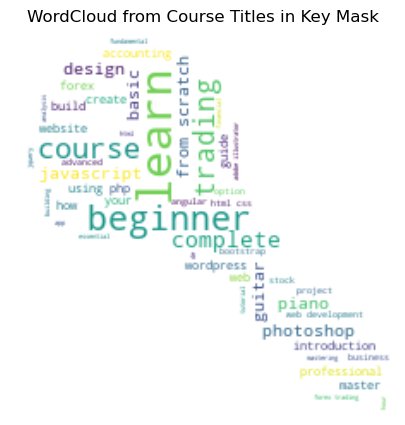

In [6]:
import csv
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import numpy as np


with open('udemy_courses.csv', 'r', encoding = 'utf-8') as file: 
    nd = csv.reader(file)
    header = next(nd)
    course_title = []
    for i in nd: 
        course_title.append(i[1])
stop_words = set([
    'a', 'an', 'the', 'and', 'in', 'on', 'of', 'at', 'for', 'with', 'as', 'to', 'by', 'is', 'are', 'it', 'that', 'this', 'which', 'be', 'of'
])
text = ' '.join(course_title).lower()
word = text.split()
filter_words = [ i for i in word if i not in stop_words]

cleaned_text = ' '.join(filter_words)

wordcloud = WordCloud(
    width=800, height=400, 
    background_color="black", 
    stopwords=stop_words, 
    max_words=200
).generate(cleaned_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.title("WordCloud from Course Titles")
plt.show()
image_text = np.array(Image.open("chiakhoa.jpg"))

wordcloud = WordCloud(
    width=800, height=400, 
    background_color="white", 
    stopwords=stop_words, 
    max_words=200,
    mask=image_text,
    contour_width = 1, 
    contour_color='white'
).generate(cleaned_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.title("WordCloud from Course Titles in Key Mask")
plt.show()



#### 3
•	Cho dữ liệu supermarket_sales.csv, thực hiện các yêu cầu sau :

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# 1. Read the dataset and display general information: head, tail, info, and statistical summary
data = pd.read_csv('supermarket_sales.csv')
print(data.head())       # Display the first 5 rows
print(data.tail())       # Display the last 5 rows
print(data.info())       # Show column types and non-null counts
print(data.describe())   # Show statistical summary of numerical columns

# 2. Check for missing (null) values in each column
print(data.isnull().sum())

# 3. Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])
print(data.dtypes)       # Verify the new data types

# 4. Add a new column 'weekday' that shows the day of the week based on the 'Date' column
data['weekday'] = data["Date"].dt.day_name()

# 5. Add a new column 'month_name' that shows the month name based on the 'Date' column
data['month_name'] = data["Date"].dt.month_name()


    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

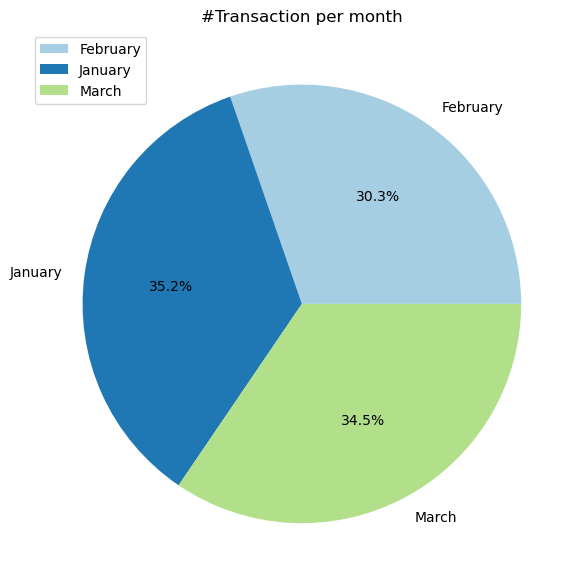

In [8]:
# 6. Plot a chart showing the percentage of transactions across different months as shown in the sample image, and provide your observations.

monthly_transactions = data.groupby('month_name')['Invoice ID'].count()
plt.figure(figsize=(6,6))
monthly_transactions.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors, legend=True)
plt.xlabel('')
plt.ylabel('')
plt.title('#Transaction per month')
plt.tight_layout()
plt.show()




##### Observations:
- January has the highest transaction count (35.2%), followed by March (34.5%) and February (30.3%).
- This could be due to New Year shopping trends or promotional events driving higher purchases.

##### Action: 
- Businesses should focus on promotions in January to leverage high consumer demand.
- February has the lowest transaction count, so targeted campaigns or discounts may help boost sales.

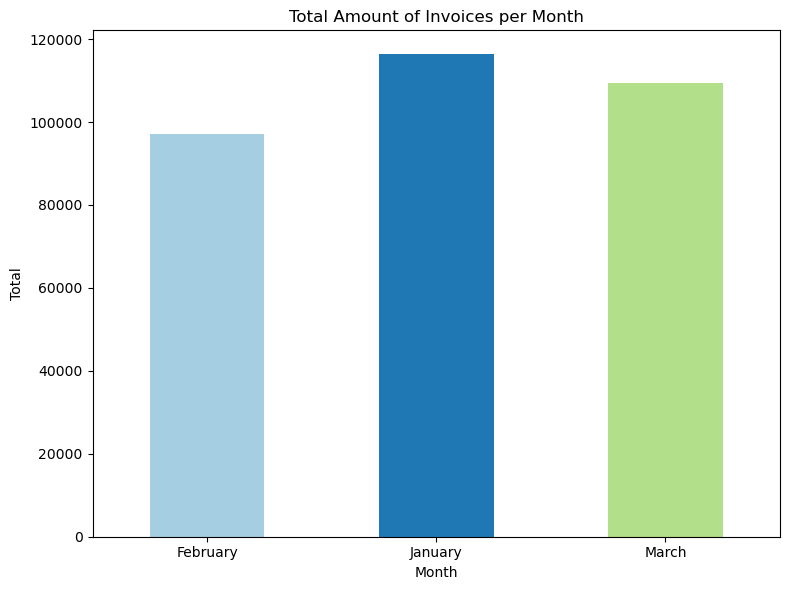

In [9]:
# 7. Plot a chart showing the total invoice amount across different months, and provide your observations.

monthly_price = data.groupby('month_name')['Total'].sum()
plt.figure(figsize= (8,6))
monthly_price.plot(kind='bar', color=plt.cm.Paired.colors)
plt.title('Total Amount of Invoices per Month')
plt.xlabel('Month')
plt.ylabel('Total')
plt.xticks(rotation=0)
plt.tight_layout()

##### Observations:

- January generates the highest total revenue (~120,000), followed by March.
- February has significantly lower revenue, likely due to fewer shopping days (28 days) and post-holiday spending fatigue.
##### Action :

- Not only do more transactions occur in January, but customers also spend more per transaction.
- February needs additional sales-driving incentives, such as loyalty programs or targeted marketing efforts.
Promotions at the beginning of February could help counteract the dip in spending.

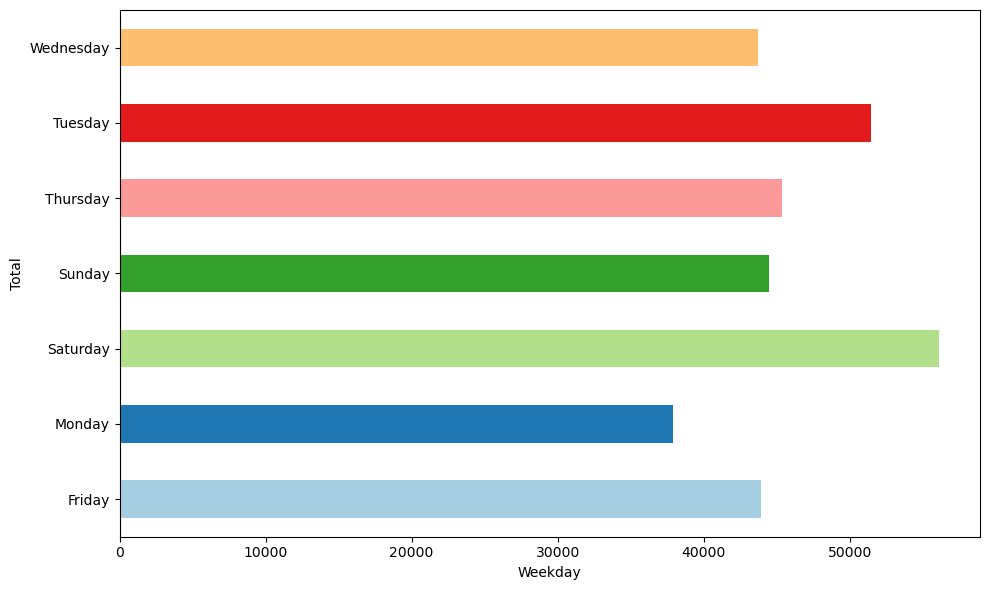

In [10]:
# 8. Plot a chart showing the total invoice amount by weekdays in the month of January, and provide your observations.

weekday_price = data.groupby('weekday')['Total'].sum()
plt.figure(figsize=(10,6))
weekday_price.plot(kind='barh',color=plt.cm.Paired.colors )
plt.xlabel('Weekday')
plt.ylabel('Total')
plt.xticks(rotation=0)
plt.tight_layout()

##### Observations:

- Saturday has the highest total revenue, followed by Tuesday and Wednesday.
- Monday has the lowest revenue.
 ##### Action:

- Saturday and Tuesday could be peak shopping days, possibly due to work schedules or planned purchases.
- Monday sees lower sales, making it an ideal day for special deals to boost traffic.
- If Saturday is consistently high, businesses should allocate more staff or resources to meet demand.

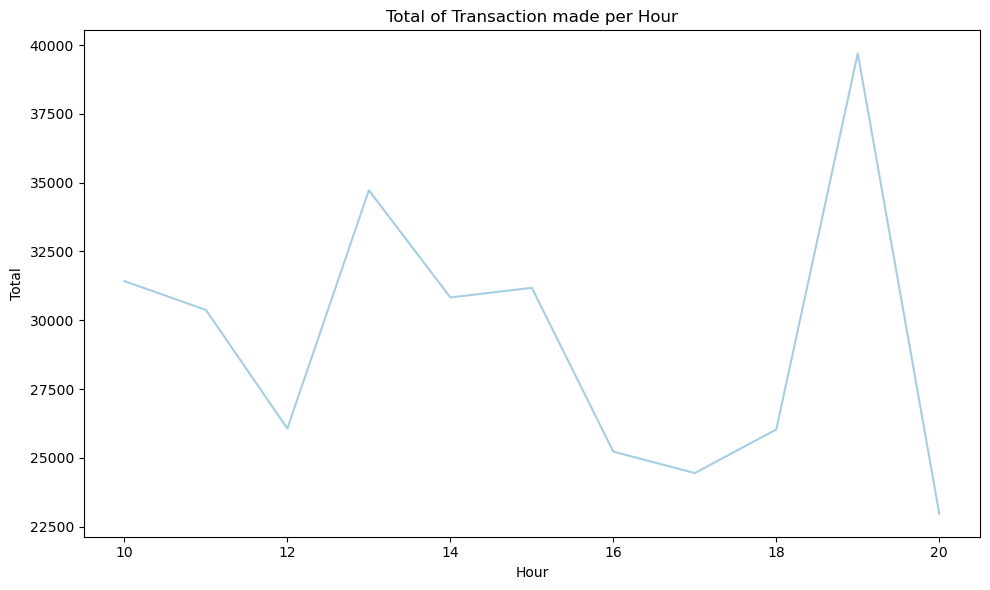

In [11]:
# 9. Plot a chart showing the total number of transactions per hour as shown in the sample image.
data["Hour"] = pd.to_datetime(data["Time"], format="%H:%M").dt.hour

hourly_transactions = data.groupby('Hour')['Total'].sum()
plt.figure(figsize=(10,6) )
hourly_transactions.plot(kind='line', color=plt.cm.Paired.colors)
plt.xlabel("Hour")
plt.ylabel("Total")
plt.title("Total of Transaction made per Hour")
plt.tight_layout()

#### Observation:

- Peak transaction hours are 1 PM and 7 PM, while the lowest activity is around 4 PM and after 8 PM.
- A sharp increase in transactions occurs after noon (12 PM - 1 PM).
- Transactions drop sharply after 7 PM.

##### Action:

- Prime sales hours are 12 PM - 2 PM and 6 PM - 7 PM.
- Between 4 PM - 5 PM, transactions drop, making it a good time for flash discounts or happy-hour deals.
- More staff should be scheduled during peak hours to ensure smooth customer service.

In [12]:
data["Time"] = pd.to_datetime(data["Time"], infer_datetime_format=True)
grouped_data = data.groupby(['Gender', 'Product line']).agg({
    'Total': 'sum'
}).reset_index()  # Resets index to turn the grouped columns back into normal columns

# Now you can print the first few rows of the grouped data
print(grouped_data.head())

# Stripping any leading or trailing spaces in column names (if necessary)
grouped_data.columns = grouped_data.columns.str.strip()


   Gender            Product line       Total
0  Female  Electronic accessories  27102.0225
1  Female     Fashion accessories  30437.4000
2  Female      Food and beverages  33170.9175
3  Female       Health and beauty  18560.9865
4  Female      Home and lifestyle  30036.8775


/var/folders/k7/rljyypp9343__2xr47zglj2c0000gn/T/ipykernel_81887/2096639074.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data["Time"] = pd.to_datetime(data["Time"], infer_datetime_format=True)
/var/folders/k7/rljyypp9343__2xr47zglj2c0000gn/T/ipykernel_81887/2096639074.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Time"] = pd.to_datetime(data["Time"], infer_datetime_format=True)


In [13]:

data["Hour"] = pd.to_datetime(data["Time"]).dt.hour
# 10. Plot a treemap chart showing the total revenue by product line and gender.
grouped_data  = data.groupby(["Product line", "Gender"])["Total"].sum().reset_index()
fig = px.treemap(grouped_data, 
                 path=['Product line', 'Gender'],
                 values="Total",
                 color = 'Product line',
                 title= 'Total Revenue by Product line and gender',
                 width=900,
                 height=600
                 )

fig.show() 


##### Observations:

- "Food and Beverages" and "Electronic Accessories" have the highest revenue.
- Gender-based spending is fairly balanced across most categories, but there are slight differences in preference.
- "Fashion Accessories" has lower revenue compared to other product lines.
##### Action:

- "Food and Beverages" and "Electronic Accessories" are the most profitable categories and should be prioritized in marketing campaigns.
- "Fashion Accessories" may require targeted promotions or reconsideration if demand remains low.
- Gender-focused marketing can be optimized (e.g., more tech-related ads for male consumers, fashion-focused campaigns for female shoppers).


#### 4.
Cho dữ liệu 2014_world_gdp.csv thực hiện các yêu cầu sau 

In [ ]:
 
import pandas
import plotly.express as px
data = pd.read_csv("2014_world_gdp.csv")
print(data.head())
print(data.tail())
print(data.info())
print(data.describe())

data[["GDP", "CODE"]] = data["GDP_CODE"].str.split(" ", expand=True)
data["GDP"] = data["GDP"].astype(float)
fig = px.choropleth(data,
                    locations="CODE",
                    locationmode="ISO-3",
                    color="GDP",
                    hover_name="COUNTRY",
                    color_continuous_scale="Blues",
                    title="World GDP by Country (2014)"
                    )
fig.show()


   Unnamed: 0         COUNTRY   GDP_CODE
0           0     Afghanistan  21.71 AFG
1           1         Albania   13.4 ALB
2           2         Algeria  227.8 DZA
3           3  American Samoa   0.75 ASM
4           4         Andorra    4.8 AND
     Unnamed: 0         COUNTRY   GDP_CODE
217         217  Virgin Islands   5.08 VGB
218         218       West Bank   6.64 WBG
219         219           Yemen  45.45 YEM
220         220          Zambia  25.61 ZMB
221         221        Zimbabwe  13.74 ZWE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  222 non-null    int64 
 1   COUNTRY     222 non-null    object
 2   GDP_CODE    222 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.3+ KB
None
       Unnamed: 0
count  222.000000
mean   110.500000
std     64.230055
min      0.000000
25%     55.250000
50%    110.500000
75%    165.